Лабораторная работа №2. 
Визуальный анализ данных

In [1]:
# Подключение библиотек и загрузка данных 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = "../MMO/Datasets/stars_lab2.csv"
data = pd.read_csv(data_path)
data.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Одиночные признаки

In [4]:
# Количественные признаки

data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

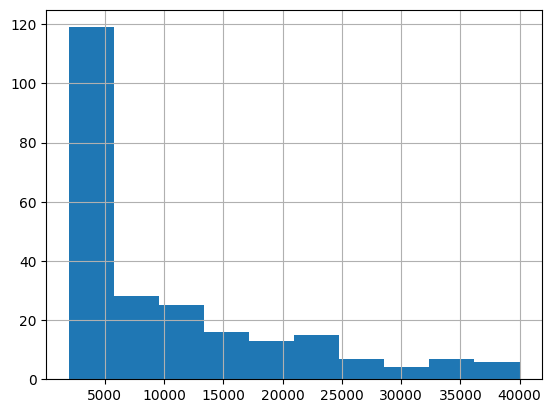

In [26]:
# Применение pandas для визуализации данных

data['Temperature (K)'].hist();

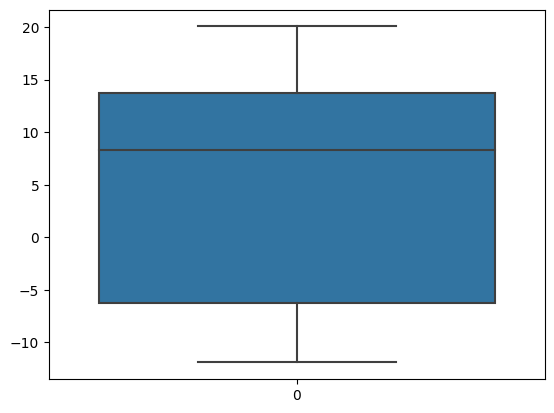

In [9]:
# Использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы

sns.boxplot(data['Absolute magnitude(Mv)']);

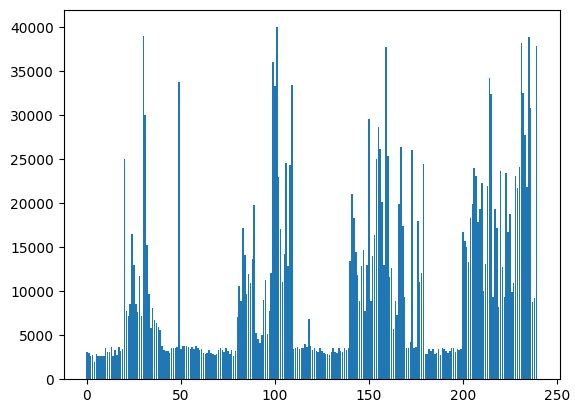

In [25]:
plt.bar(data.index, data['Temperature (K)'])
plt.show()

Категориальные признаки

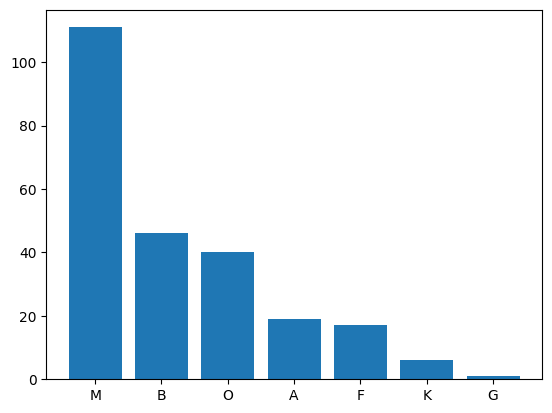

In [29]:
# определение первых n "популярных" классов звёзд 

hist = data['Spectral Class'].value_counts()
plt.bar(hist.index, hist);

In [34]:
# подсчёт количества классов звёзд

data['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Взаимосвязанные признаки

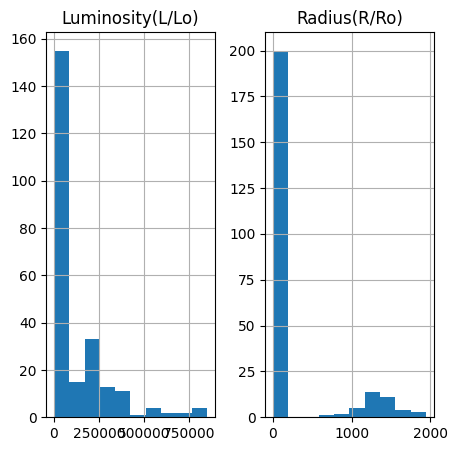

In [46]:
# Количественный - количественный
# Отбор числовых признаков, содержащих символ '/'

feats = [f for f in data.columns if '/' in f]

# строим отдельные гистограммы 
# для нескольких признаков

data[feats].hist(figsize=(5,5));

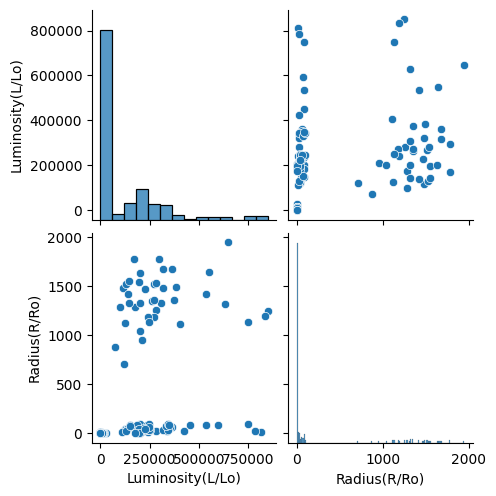

In [47]:
# Попарное распределение признаков
# Применение Seaborn

sns.pairplot(data[feats]);

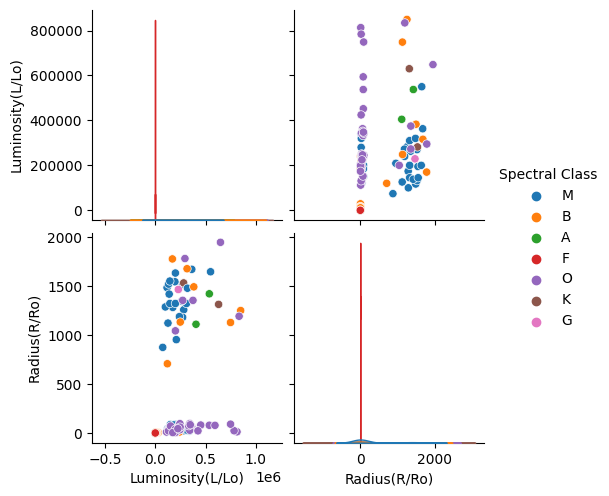

In [48]:
sns.pairplot(data[feats + ['Spectral Class']], hue='Spectral Class');

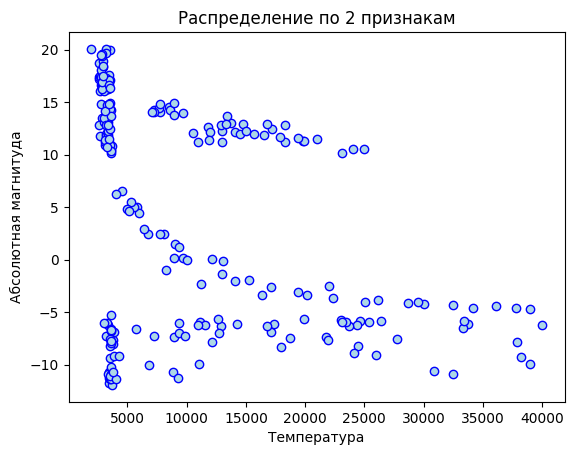

In [50]:
plt.scatter(data['Temperature (K)'], 
            data['Absolute magnitude(Mv)'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('Температура')
plt.ylabel('Абсолютная магнитуда')
plt.title('Распределение по 2 признакам');

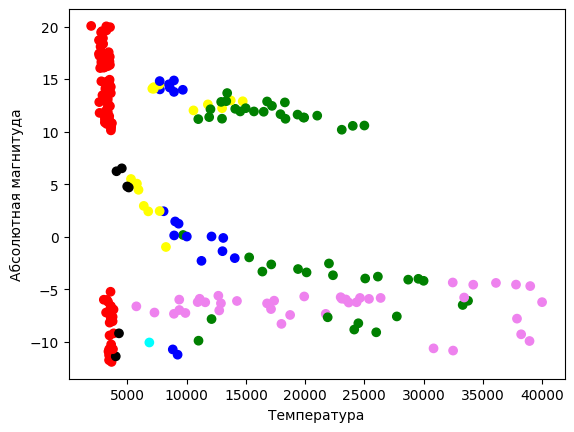

In [55]:
# Раскрашивание данных
# Цвет в зависимости от класса звезды

c = data['Spectral Class'].map({'M': 'red', 'B': 'green', 'A': 'blue', 'F': 'yellow', 'O': 'violet', 'K': 'black', 'G': 'cyan'})
edge_c = data['Spectral Class'].map({'M': 'red', 'B': 'green', 'A': 'blue', 'F': 'yellow', 'O': 'violet', 'K': 'black', 'G': 'cyan'})

# Настройка графика

plt.scatter(data['Temperature (K)'], data['Absolute magnitude(Mv)'], color=c, edgecolors=edge_c)
plt.xlabel('Температура')
plt.ylabel('Абсолютная магнитуда');

In [57]:
# Применяется функция corr() из Pandas

data.corr()

C:\Users\Daniil\AppData\Local\Temp\ipykernel_928\2930231015.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


C:\Users\Daniil\AppData\Local\Temp\ipykernel_928\1890662685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);


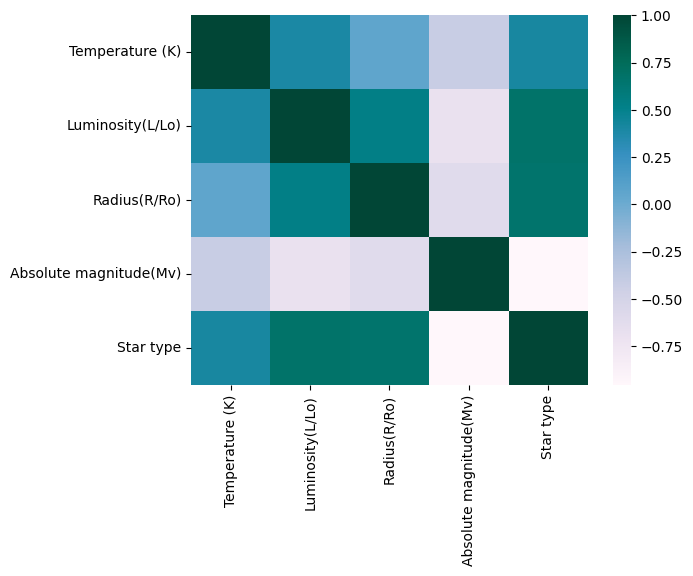

In [58]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);

C:\Users\Daniil\AppData\Local\Temp\ipykernel_928\771017208.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);


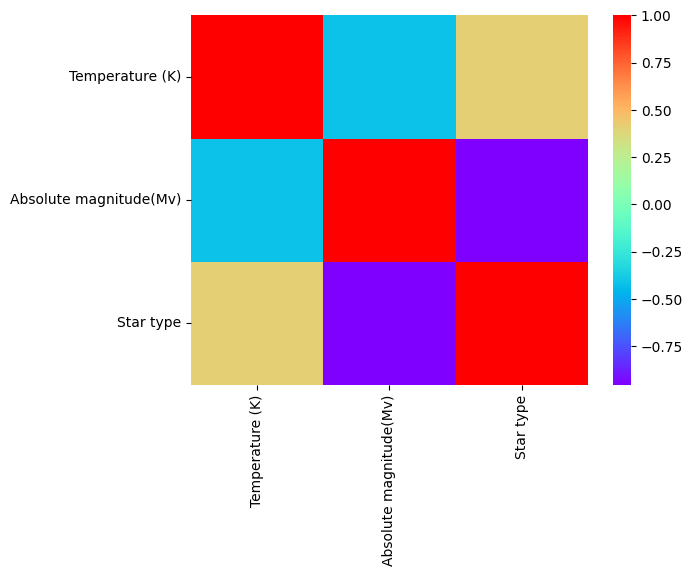

In [60]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

# Перестраиваем heatmap без коррелирующих признаков
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);